# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib as mpl

# Data

Indian housing prices in metropolitan areas:
https://www.kaggle.com/ruchi798/housing-prices-in-metropolitan-areas-of-india

In [19]:
#df = pd.read_csv('https://tinyurl.com/tsdf68xp')
#df.head()

In [3]:
df = pd.read_csv('data/Bangalore.csv')
df.rename(columns={"No. of Bedrooms": "Rooms"}, inplace=True)
df.head()

,Price,Area,Location,Rooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,Price,Area,Rooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


# A Pandas Boxplot

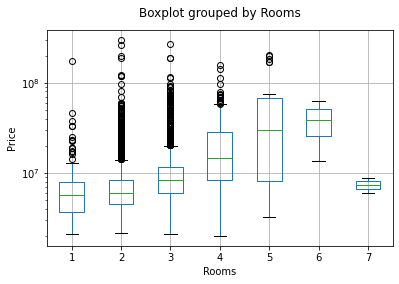

In [5]:
#quick pandas boxplot
#recommeded over matplotlib's since we can split by a factor.
df.boxplot(column=['Price'], by=['Rooms'])
plt.title("")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.yscale("log")
plt.show()

In [6]:
#enter before plt.show() to save figure
#plt.savefig("boxplot.png")

# Data Grouping

Let's start by making a smaller dataframe with just Rooms and Price

In [7]:
dfsub = df[['Rooms', 'Price']]
dfsub.head()

,Rooms,Price
0,4,30000000
1,2,7888000
2,2,4866000
3,3,8358000
4,3,6845000


In [8]:
#taking care of the renaming process here, so our merged dataframe won't all have "price" column labels
meanPrice=dfsub.groupby('Rooms').mean().rename(columns={"Price": "meanPrice"})
price_25per=dfsub.groupby('Rooms').quantile(q=.25).rename(columns={"Price": "price_25per"})
price_75per=dfsub.groupby('Rooms').quantile(q=.75).rename(columns={"Price": "price_75per"})
maxPrice=dfsub.groupby('Rooms').max().rename(columns={"Price": "maxPrice"})
minPrice=dfsub.groupby('Rooms').min().rename(columns={"Price": "minPrice"})
price_5per=dfsub.groupby('Rooms').quantile(q=.05).rename(columns={"Price": "price_5per"})
price_95per=dfsub.groupby('Rooms').quantile(q=.95).rename(columns={"Price": "price_95per"})

do the groupby once, then interrogate - more efficient than re-calling groupby on every line

In [9]:
groupP=dfsub.groupby('Rooms')
#groupby attributes
meanPrice=groupP.mean().rename(columns={"Price": "meanPrice"})
price_25per=groupP.quantile(q=.25).rename(columns={"Price": "price_25per"})
price_75per=groupP.quantile(q=.75).rename(columns={"Price": "price_75per"})
maxPrice=groupP.max().rename(columns={"Price": "maxPrice"})
minPrice=groupP.min().rename(columns={"Price": "minPrice"})
price_5per=groupP.quantile(q=.05).rename(columns={"Price": "price_5per"})
price_95per=groupP.quantile(q=.95).rename(columns={"Price": "price_95per"})
byRoom_count=groupP.count().rename(columns={"Price":"byRoom_count"})

In [18]:
# Make a list of the dataframes
data_frames = [meanPrice, price_25per, price_75per, maxPrice,minPrice, 
               price_5per, price_95per, byRoom_count]
# Merge them all at once
merged_df = pd.concat(data_frames, join='outer', axis=1)

In [11]:
merged_df.head(7)

,meanPrice,price_25per,price_75per,maxPrice,minPrice,price_5per,price_95per,byRoom_count
Rooms,,,,,,,,
1,7.633600e+06,3735000.0,7830000.0,175000000,2096000,2725200.0,1.811500e+07,230
2,8.219177e+06,4489000.0,8400000.0,300000000,2150000,3026700.0,1.950000e+07,2750
3,1.129293e+07,6055500.0,11700000.0,270000000,2100000,3261999.0,2.701000e+07,2799
4,2.071374e+07,8410250.0,28100000.0,157700000,2000000,3946200.0,5.019500e+07,402
5,5.983359e+07,8105000.0,67425000.0,202700000,3232000,3277550.0,1.977850e+08,22
6,3.815000e+07,25775000.0,50525000.0,62900000,13400000,15875000.0,6.042500e+07,2
7,7.403000e+06,6709000.0,8097000.0,8791000,6015000,6153800.0,8.652200e+06,2


# Plotting

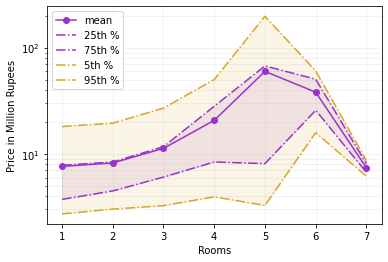

In [12]:
#naming shortcuts
x=merged_df.index
y=merged_df.meanPrice/1000000
y_low=merged_df.price_25per/1000000
y_high=merged_df.price_75per/1000000
y1_low=merged_df.price_5per/1000000
y1_high=merged_df.price_95per/1000000
#make lots of line plots:
plt.plot(x, y, color='darkorchid', marker='o', label='mean') 
plt.plot(x, y_low, color='darkorchid', linestyle='-.', label='25th %') 
plt.plot(x, y_high, color='darkorchid', linestyle='-.', label='75th %') 
plt.plot(x, y1_low, color='goldenrod', linestyle='-.', label='5th %') 
plt.plot(x, y1_high, color='goldenrod', linestyle='-.', label='95th %') 
plt.legend()
#fill between the upper and lower bands
plt.fill_between(x, y_low, y_high, alpha = .1,color = 'darkorchid')
plt.fill_between(x, y1_low, y1_high, alpha = .1,color = 'goldenrod')
#add background grid for visual appeal
plt.grid(alpha = .2, which='both')
plt.yscale("log")
plt.xlabel('Rooms')
plt.ylabel('Price in Million Rupees')
plt.show()

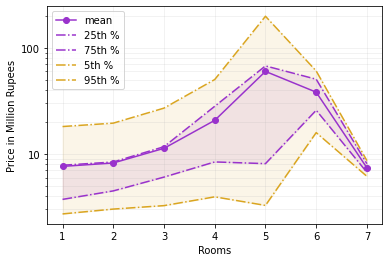

In [13]:
#Or here's with object-oriented matplotlib:
#naming shortcuts
x=merged_df.index
y=merged_df.meanPrice/1000000
y_low=merged_df.price_25per/1000000
y_high=merged_df.price_75per/1000000
y1_low=merged_df.price_5per/1000000
y1_high=merged_df.price_95per/1000000
#object-oriented matplotlib:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y, color='darkorchid', marker='o', label='mean') 
ax.plot(x, y_low, color='darkorchid', linestyle='-.', label='25th %') 
ax.plot(x, y_high, color='darkorchid', linestyle='-.', label='75th %') 
ax.plot(x, y1_low, color='goldenrod', linestyle='-.', label='5th %') 
ax.plot(x, y1_high, color='goldenrod', linestyle='-.', label='95th %') 
ax.legend()
#fill between the upper and lower bands
ax.fill_between(x, y_low, y_high, alpha = .1,color = 'darkorchid')
ax.fill_between(x, y1_low, y1_high, alpha = .1,color = 'goldenrod')
#add background grid for visual appeal
ax.grid(alpha = .2, which='both')
ax.set_yscale("log")
ax.set_xlabel('Rooms')
ax.set_ylabel('Price in Million Rupees')
#Let's get rid of the scientific notation on the y-axis
fmt = mpl.ticker.StrMethodFormatter("{x:g}")
ax.yaxis.set_major_formatter(fmt)
plt.show()

In [14]:
# Could get every value on x-axis with:
#x_ticks = np.arange(1, x.size+2, 1)
#ax.set_xticks(x_ticks)

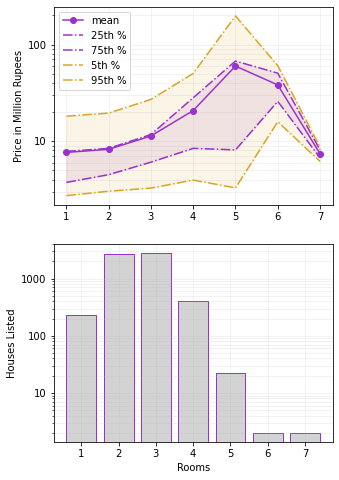

In [15]:
#Or here's with object-oriented matplotlib:
#naming shortcuts
x=merged_df.index
y=merged_df.meanPrice/1000000
y_low=merged_df.price_25per/1000000
y_high=merged_df.price_75per/1000000
y1_low=merged_df.price_5per/1000000
y1_high=merged_df.price_95per/1000000
#object-oriented matplotlib:
fig, (ax1, ax2) = plt.subplots(2, figsize=(5,8))
ax1.plot(x, y, color='darkorchid', marker='o', label='mean') 
ax1.plot(x, y_low, color='darkorchid', linestyle='-.', label='25th %') 
ax1.plot(x, y_high, color='darkorchid', linestyle='-.', label='75th %') 
ax1.plot(x, y1_low, color='goldenrod', linestyle='-.', label='5th %') 
ax1.plot(x, y1_high, color='goldenrod', linestyle='-.', label='95th %') 
ax1.legend()
#fill between the upper and lower bands
ax1.fill_between(x, y_low, y_high, alpha = .1,color = 'darkorchid')
ax1.fill_between(x, y1_low, y1_high, alpha = .1,color = 'goldenrod')
#add background grid for visual appeal
ax1.grid(alpha = .2, which='both')
ax1.set_yscale("log")
ax1.set_ylabel('Price in Million Rupees')
#Let's get rid of the scientific notation on the y-axis
fmt = mpl.ticker.StrMethodFormatter("{x:g}")
ax1.yaxis.set_major_formatter(fmt)

#bar plot
ax2.bar(x, merged_df.byRoom_count, color='lightgray', edgecolor='darkorchid')
ax2.set_yscale("log")
ax2.set_xlabel('Rooms')
ax2.set_ylabel('Houses Listed')
ax2.grid(alpha = .2, which='both')
ax2.yaxis.set_major_formatter(fmt)
plt.show()